## 3D CNN Instance Segmentation of Proteins in cryoET Tomograms

### Adding synthetic tomograms as training data

Access synthetic tomograms via API

In [ ]:
!pip install -U cryoet-data-portal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install copick git+https://github.com/copick/copick-utils.git git+https://github.com/copick/DeepFindET.git

  Cloning https://github.com/copick/copick-utils.git to /tmp/pip-req-build-qj8ejv2j
  Running command git clone --filter=blob:none --quiet https://github.com/copick/copick-utils.git /tmp/pip-req-build-qj8ejv2j
  Resolved https://github.com/copick/copick-utils.git to commit d72192abb2d18dcd0ff8caa749f2327cf24ce894
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/copick/DeepFindET.git to /tmp/pip-req-build-7zpvu4d3
  Running command git clone --filter=blob:none --quiet https://github.com/copick/DeepFindET.git /tmp/pip-req-build-7zpvu4d3
  Resolved https://github.com/copick/DeepFindET.git to commit 15cef0e7a6000ea73df440042a8999812992e57d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setu

## Set up config file

In [ ]:
# config file
config_blob = """{
  "name": "czii_cryoet_mlchallenge_2024",
  "description": "2024 CZII CryoET ML Challenge training data.",
  "version": "1.0.0",

  "pickable_objects":[
    {
            "name": "apo-ferritin",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-amylase",
            "is_particle": true,
            "pdb_id": "1FA2",
            "label": 2,
            "color": [153,  63,   0, 128],
            "radius": 65,
            "map_threshold": 0.035
        },
        {
            "name": "beta-galactosidase",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like-particle",
            "is_particle": true,
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        },
        {
            "name": "membrane",
            "is_particle": false,
            "label": 8,
            "color": [100, 100, 100, 128]
        },
        {
            "name": "background",
            "is_particle": false,
            "label": 9,
            "color": [10, 150, 200, 128]
        }
  ],

  "overlay_root": "/content/drive/MyDrive/cryoET/output/overlay",

  "overlay_fs_args":{
    "auto_mkdir": true
  },

  "static_root":"/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/static"
}"""

copick_config_path = "/content/drive/MyDrive/cryoET/copick.config"
output_overlay = "/content/drive/MyDrive/cryoET/output/overlay"

with open(copick_config_path, "w") as f:
  f.write(config_blob)


In [ ]:
import os
import shutil

# set up new overlay directory

# define source and destination derectories
source_dir = "/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/overlay"
destination_dir = output_overlay

# walk through the source directory
for root, dirs, files in os.walk(source_dir):
  # create corresponding subdir n the destination
  relative_path = os.path.relpath(root, source_dir)
  target_dir = os.path.join(destination_dir, relative_path)
  os.makedirs(target_dir, exist_ok=True)

  # copy and rename each file
  for file in files:
    if file.startswith("curation_0_"):
      new_filename = file
    else:
      new_filename = f"curation_0_{file}"

    # define full path for the source and destination files
    source_file = os.path.join(root, file)
    destination_file = os.path.join(target_dir, new_filename)

    # copy the file with the new name
    shutil.copy2(source_file, destination_file)
    print(f"Copied {source_file} to {destination_file}")


Copied /content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/virus-like-particle.json to /content/drive/MyDrive/cryoET/output/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_virus-like-particle.json
Copied /content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/thyroglobulin.json to /content/drive/MyDrive/cryoET/output/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_thyroglobulin.json
Copied /content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/ribosome.json to /content/drive/MyDrive/cryoET/output/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_ribosome.json
Copied /content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/beta-amylase.json to /content/drive/MyDrive/cryoET/output/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_beta-amylase.json
Copied /content/drive/MyDrive/cryoET

## Step 1. Training data prep
Build target from tomograms for training


In [ ]:
from deepfindET.entry_points import step1
from deepfindET.utils import copick_tools
import matplotlib.pyplot as plt
import copick

%matplotlib inline

############ Input Parameters ################

# config file
config = copick_config_path

# Query Tomogram
voxel_size = 10
tomogram_algorithm = 'denoised' # The reconstruction algorithm used for the tomogram

# Output name for the Segmentation Targets
out_name = 'remotetargets'
out_user_id = 'deepfindET'
out_session_id = '1'

# Read Copick Directory
copickRoot = copick.from_file(config)

# Query Train Protein coordinates and any Associated Segmentations\
train_targets = {}

# Define protein targets with their respective radii
# there are two forms of inputs:
# ('protein-name', radius) or
# ('protein-name', 'user-id', 'session-id', 'radius')

targets = [
    (obj.name, None, None, (obj.radius/voxel_size))
    for obj in copickRoot.pickable_objects if obj.is_particle
]

# targets = [
#     ('adp-mitochondrial', None, None, 7.5),
#     ('alkaline-phosphate', None, None, 7.5),
#     ('nucleosome', None, None, 6.5),
#     ('ribosome', None, None, 11),
#     ('vault', None, None, 13),
#     ('virus-like-capsid', None, None, 11)
# ]

# Set run_ids to None, indicating that targets will be generated for the entire CoPick project by default.
# If specific Run-IDs were provided, this variable would contain a list of those IDs.
run_ids = None


Generate the targets for the model through a function, the other way is via CLI.

In [ ]:
# Generate train target information
for t in targets:
  obj_name, user_id, session_id, radius = t
  info = {
      "label": copickRoot.get_object(obj_name).label,
      "user_id": user_id,
      "session_id": session_id,
      "radius": radius,
      "is_particle_target": True,
  }
  train_targets[obj_name] = info

# Define segmentation target (e.g., membrane)
seg_targets = [('membrane', None, None)]

# Generate segmentation target information
for s in seg_targets:
  obj_name, user_id, session_id = s
  info = {
      "label": copickRoot.get_object(obj_name).label,
      "user_id": user_id,
      "session_id": session_id,
      "radius": None,
      "is_particle_target": False,
  }
  train_targets[obj_name] = info

# Call the create_train_targets function from step1 to generate the traingin targets for the 3D u-net model
# The funtion will use the parameters defined in the previous cells and following inputs
step1.create_train_targets(
    config,
    train_targets,
    run_ids,
    voxel_size,
    tomogram_algorithm,
    out_name,
    out_user_id,
    out_session_id,
)


Processing Run: TS_5_4
Annotating 140 objects ...

Processing Run: TS_69_2
Annotating 143 objects ...

Processing Run: TS_6_4
Annotating 193 objects ...

Processing Run: TS_6_6
Annotating 143 objects ...

Processing Run: TS_73_6
Annotating 217 objects ...

Processing Run: TS_86_3
Annotating 225 objects ...

Processing Run: TS_99_9
Annotating 208 objects ...



Visualize the Tomogram and Target Volumes

In [ ]:
run_ids

In [ ]:
# Option 1 : query all RunIDs
# Retrieve all availabe Run-IDs from the CoPick project,
# This generates a list of Run-IDs by iterating over all runs in copickRoot.
run_ids = [run.name for run in copickRoot.runs]

# Option 2 : Manually specify specific run
# Define a specific Run-ID manually.
# This is useful for extracting volumes for a specific run.
runID = 'TS_5_4'

# Retrieve the specific run object from CoPick using the manually specified Run-ID
copick_run = copickRoot.get_run(runID)

# Extract the segmentation target associated with the specific run.
# The function get_copick_segmmentation retrieves the segmentation data (e.g., target volume)
# based on the run object, segmentation name, user ID, and session ID
train_targets = copick_tools.get_copick_segmentation(
    copick_run,
    segmentationName = 'remotetargets',
    userID = 'deepfindET',
    sessionID = '1'
)

# Retrieve the tomogram associated with the specific Run-ID from the copick project
# The function get_copick_topogram extracts the tomogram data, using the voxel size, algorithm and Run ID
train_tomogram = copick_tools.get_copick_tomogram(
    copickRoot,
    voxelSize = voxel_size,
    # tomoAlgorithm = 'wbp'   #'wbp' (weighted back projection).
    tomoAlgorithm='denoised',    # The reconstruction algorithm used for the tomogram
    tomoID = runID
)

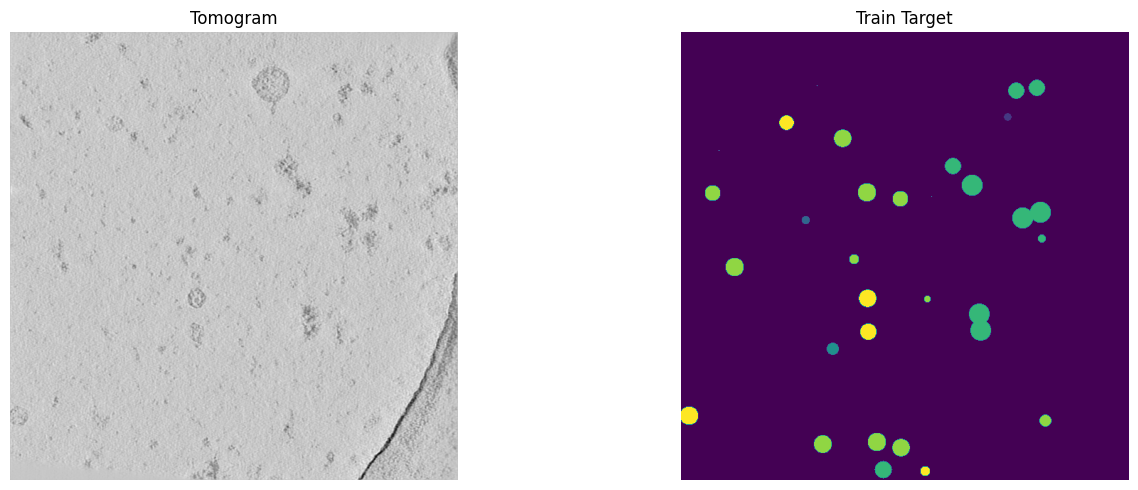

In [ ]:
plt.figure(figsize = (15, 5))

# Original image
plt.subplot(1,2,1)
plt.title('Tomogram')
plt.imshow(train_tomogram[90,], cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Train Target')
plt.imshow(train_targets[90,])
plt.axis('off')

plt.tight_layout()
plt.show()


## Step 2. Training DeepFindET 3D CNN model

In [ ]:
from deepfindET.entry_points import step2

# specify dir where the training results will be saved
training_output_path = '/content/drive/MyDrive/cryoET/output/training'

# which combines U-net with residual connections to improve training
model_name = 'res_unet'  # framework is TensorFlow

# model betrained from scratch without using pre-trained weights
model_pre_weights = None

# Number of classes to predict with the model
# 8 classes = 6 proteins + membrane + background
n_class = 8

# Input dimension size of the 3D volumns in voxels,
# each input is 72x72x72 voxel cube -- (72 Å)^3.
dim_in = 72 # [voxels]

**Launch model training**

In [ ]:
# Initiate the training of DeepFindET 3D U-Net model.
# The training parameters will automatically be saved in the training_output_path as experiment_config.json

step2.train_model(
    config,
    voxel_size,      # Determines the resolution of the 3D input data.
    tomogram_algorithm,
    targets,      # the ground truth segmentation labels used for training.
    training_output_path,
    model_name,   # The architecture of the neural network.
    model_pre_weights,
    n_class,
    path_valid=None,  # Path to validation data (None means internal splitting may be used).
    dim_in = dim_in, # Input dimension size in voxels.
    n_sub_epoch = 10, # Number of epochs per tomogram.
    sample_size = 3,
    batch_size = 5,
    epochs = 20,
    steps_per_epoch = 150,
    n_valid = 20,
    model_filters = [48, 64, 128], # Number of filters in each convolutional layer.
    model_dropout = 0, # Dropout rate for regularization.
    target_name = "remotetargets",
    target_user_id = "deepfindET",
    target_session_id = "1",
    valid_tomo_ids = None,
    train_tomo_ids = None,
    class_weights = (('apo-ferritin', 62400), ('beta-amylase', 4130),
                    ('beta-galactosidase', 3080), ('ribosome', 1800),
                    ('thyroglobulin', 10100), ('virus-like-particle', 8400))
)



Training res_unet with Randomly Initialized Weights

Physical devices cannot be modified after being initialized
Loading Targets and Tomograms for the Following Runs: ['TS_6_4', 'TS_6_6', 'TS_73_6']


100%|██████████| 3/3 [00:07<00:00,  2.64s/it]


Loading Targets and Tomograms for the Following Runs: ['TS_5_4', 'TS_69_2']


100%|██████████| 2/2 [00:04<00:00,  2.10s/it]


Configuration saved to /content/drive/MyDrive/cryoET/output/training/experiment_config.json

Training Parameters:  {
    "input": {
        "config_path_train": "/content/drive/MyDrive/cryoET/copick.config",
        "config_path_valid": null,
        "target_name": "remotetargets",
        "target_user_id": "deepfindET",
        "target_session_id": "1"
    },
    "output": {
        "out_dir": "/content/drive/MyDrive/cryoET/output/training",
        "classes": {
            "apo-ferritin": 1,
            "beta-amylase": 2,
            "beta-galactosidase": 3,
            "ribosome": 4,
            "thyroglobulin": 5,
            "virus-like-particle": 6,
            "membrane": 8,
            "background": 9
        }
    },
    "network_architecture": {
        "architecture": "res_unet",
        "layers": [
            48,
            64,
            128
        ],
        "dropout_rate": 0.0
    },
    "training_params": {
        "n_class": 8,
        "dim_in": 72,
        "batch_

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-12-28794557a54c>", line 4, in <cell line: 4>

  File "/usr/local/lib/python3.10/dist-packages/deepfindET/entry_points/step2.py", line 344, in train_model

  File "/usr/local/lib/python3.10/dist-packages/deepfindET/training_copick.py", line 197, in launch

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 360, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py", line 96, in on_epoch_end

  File "/usr/local/lib/python3.10/dist-packages/deepfindET/callbacks.py", line 196, in on_epoch_end

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

Out of memory while trying to allocate 8791033368 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_data_distributed_53252]

In [ ]:
# config file for inference
config_blob = """{
  "name": "czii_cryoet_mlchallenge_2024",
  "description": "2024 CZII CryoET ML Challenge training data.",
  "version": "1.0.0",

  "pickable_objects":[
    {
            "name": "apo-ferritin",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-amylase",
            "is_particle": true,
            "pdb_id": "1FA2",
            "label": 2,
            "color": [153,  63,   0, 128],
            "radius": 65,
            "map_threshold": 0.035
        },
        {
            "name": "beta-galactosidase",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like-particle",
            "is_particle": true,
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        },
        {
            "name": "membrane",
            "is_particle": false,
            "label": 8,
            "color": [100, 100, 100, 128]
        },
        {
            "name": "background",
            "is_particle": false,
            "label": 9,
            "color": [10, 150, 200, 128]
        }
  ],

  "overlay_root": "/content/drive/MyDrive/cryoET/output/test/overlay",

  "overlay_fs_args":{
    "auto_mkdir": true
  },

  "static_root":"/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/test/static"
}"""

copick_config_path = "/content/drive/MyDrive/cryoET/output/copick.config"
output_overlay = "/content/drive/MyDrive/cryoET/output/test/overlay"

with open(copick_config_path, "w") as f:
  f.write(config_blob)


## Step 3. Perform Inference on Test Data and Evaluate Results

In [ ]:
from deepfindET.entry_points import step3
from deepfindET.utils import copick_tools
import matplotlib.pyplot as plt
import numpy as np
import copick

%matplotlib inline

########################## Input Params #######################

# Copick config file
config = copick_config_path

# model parameters
n_class = 8
patch_size = 160
model_name = 'res_unet'
filters = [48, 64, 128]
dropout = 0

# path to the pre-trained model weights
model_weights = '/content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5'

# Query for Tomogram
voxel_size = 10
tomogram_algorithm = 'denoised'

# Output segmentation write name
segmentation_name = 'predict'
session_id = '0'
user_id = 'deepfindET'

################################################################

In [ ]:
# Run the train DeepFindET 3D U-Net model on copick directory
step3.inference_tomogram_segmentation(
    config,
    n_class,
    model_name,
    model_weights,
    patch_size,
    user_id,
    session_id,
    segmentation_name = segmentation_name,
    voxel_size = voxel_size,
    model_filters = filters,
    model_dropout = dropout,
    tomogram_algorithm = tomogram_algorithm,
)


Training res_unet with /content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5 Weights


Segmentation Parameters:  {
    "input": {
        "predict_config": "/content/drive/MyDrive/cryoET/output/copick.config",
        "voxel_size": 10,
        "tomogram_algorithm": "denoised"
    },
    "model_architecture": {
        "n_class": 8,
        "model_name": "res_unet",
        "path_weights": "/content/drive/MyDrive/cryoET/weights_30epechs/net_weights_epoch30.h5",
        "patch_size": 160,
        "model_filters": [
            48,
            64,
            128
        ],
        "model_dropout": 0
    },
    "output": {
        "user_id": "deepfindET",
        "session_id": "0",
        "output_scoremap": false,
        "scoremap_name": "scoremap",
        "segmentation_name": "predict",
        "tomo_ids": null
    }
} 


Processing Run: TS_5_4 (0/3)
Data array is divided in 72 patches ...
Segmenting patch 1 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 57s 57s/step
Segmenting pa

In [ ]:
# import tensorflow as tf

# model = tf.keras.models.load_model(model_weights)
# for layer in model.layers:
#   for weight in layer.weights:
#     print(weight.numpy())

Visualize the Segmentation

In [ ]:
# Specify a run to visualize
runID = 'TS_5_4'

# Retrieve the sepecific run object from CoPick
copick_root = copick.from_file(config)
copick_run = copick_root.get_run(runID)

# Extract segmentation target associated with the run
# The function get_copick_segmentation retrieves the segmentation data
# (e.g., target volume) based on the run object,
# segmentation name, user ID, and session ID.
train_target = copick_tools.get_copick_segmentation(
    copick_run,
    segmentationName = segmentation_name,
    userID = user_id,
    sessionID = session_id,
)

# Retrieve the tomogram
train_tomogram = copick_tools.get_copick_tomogram(
    copick_root,
    voxelSize = voxel_size,
    tomoAlgorithm =  tomogram_algorithm,
    tomoID = runID,
)

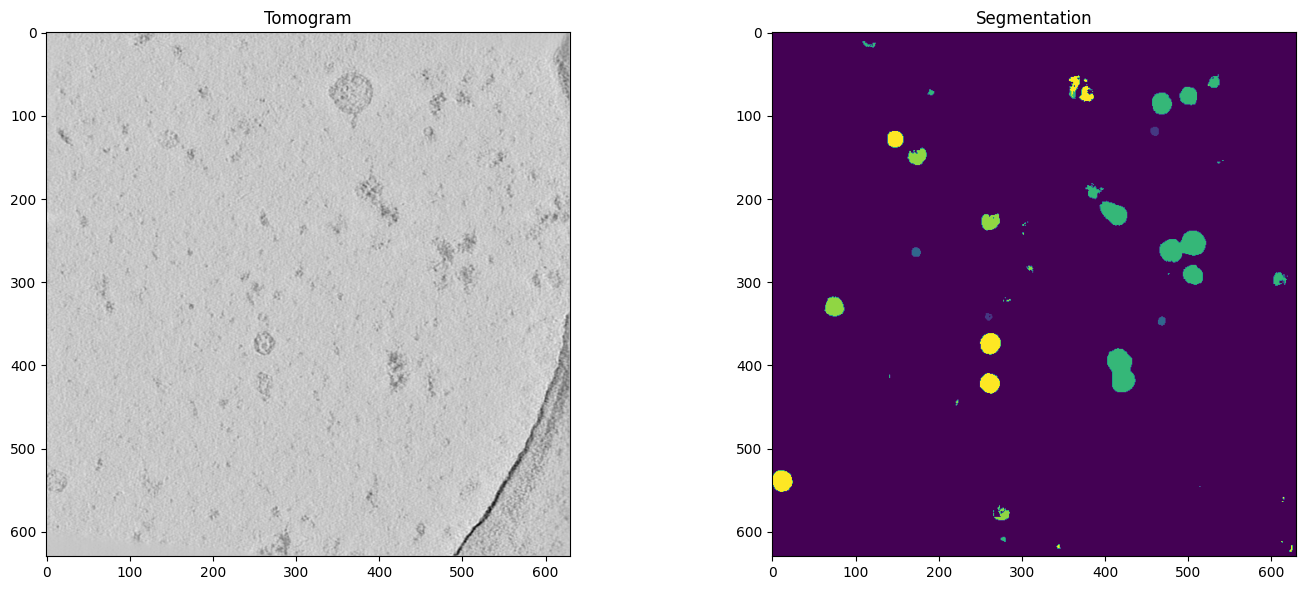

In [ ]:
# Plot the images
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Tomogram')
plt.imshow(train_tomogram[90,], cmap='gray')
# plt.axis('off')

plt.subplot(1,2,2)
plt.title('Segmentation')
plt.imshow(train_target[90,])
# plt.axis('off')

plt.tight_layout()
plt.show()

## Step 4. Measure protein coodinates from segmentation maps



In [ ]:
from deepfindET.entry_points import step4

# session ID for the output picks
picks_session_id = '0'

segmentation_session_id = '0'

segmentation_name = 'predict'

min_protein_size = 0.4

path_output = f'{copick_root.root_overlay}/ExperimentRuns'

In [ ]:
[obj.radius for obj in copick_root.pickable_objects]

[60.0, 65.0, 90.0, 150.0, 130.0, 135.0, None, None]

In [ ]:
import deepfindET.utils.copick_tools as tools
import deepfindET.utils.evaluate as evaluate
import scipy.ndimage as ndimage
from tqdm import tqdm

# Currently Filtering Process always finds coordinate at (cx,cy,cz) - center coordinate
# This seems to always be at the first row, so we can remove it
remove_index = 0

# Extract protein coordinates from the segmentation masks

def extract_coords(pickable_object, copick_run):
  labelmap = tools.get_copick_segmentation(
      copick_run,
      segmentation_name,
      user_id,
      segmentation_session_id)[:]
  label = pickable_object.label
  protein_name = pickable_object.name
  label_objs, _ = ndimage.label(labelmap == label)

  # Filter candidates based on Object Size
  # Get the sizes of all objects
  object_sizes = np.bincount(label_objs.flat)

  # Filter the objects based on size
  min_object_size = 4/3 * np.pi * ((pickable_object.radius/voxel_size)**2)*min_protein_size
  valid_objects = np.where(object_sizes > min_object_size)[0]

  # Estimate coordinates from CoM for LabelMaps
  deepFinderCoords = []
  for object_num in tqdm(valid_objects):
    com = ndimage.center_of_mass(label_objs == object_num)
    swapped_com = (com[2], com[1], com[0])
    deepFinderCoords.append(swapped_com)
  deepFinderCoords = np.array(deepFinderCoords)

  # For same reason, consistently extracting center coordinate
  # Remove the row with the closest index
  deepFinderCoords = np.delete(deepFinderCoords, remove_index, axis=0)

  # Estimate Distance Threshold based on 1/2 of particle dismeter
  threshold = np.ceil(pickable_object.radius / (voxel_size * 3))

  try:
    # remove double counted coordinates
    deepFinderCoords = evaluate.remove_repeated_picks(deepFinderCoords, threshold)

    # append Euler Angles to Coordinates [Expand Dimensions from Nx3 -> Nx6]
    deepFinderCoords = np.concatenate((deepFinderCoords, np.zeros(deepFinderCoords.shape)),axis=1)

    # convert from voxel to Physical Units
    deepFinderCoords *= voxel_size

  except Exception as e:
    print(f"Error processing label {label} in tomo {copick_run}: {e}")
    deepFinderCoords = np.array([]).reshape(0, 6)

  # Save picks in Copick Format / Directory
  tools.write_copick_output(protein_name,
                            copick_run.meta.name,
                            deepFinderCoords,
                            path_output,
                            pickMethod = user_id,
                            sessionID = picks_session_id,
                            )

for run in copick_root.runs:
  print(f"Run: {run}")
  for pickable_object in copick_root.pickable_objects:
    print(pickable_object.name)
    if pickable_object.is_particle:
      extract_coords(pickable_object, run)


Run: CopickRun(name=TS_5_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75360
apo-ferritin


100%|██████████| 58/58 [00:50<00:00,  1.15it/s]


beta-amylase


100%|██████████| 61/61 [00:53<00:00,  1.15it/s]


beta-galactosidase


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Error processing label 3 in tomo CopickRun(name=TS_5_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=1) at 0x7da11db75360: The number of observations cannot be determined on an empty distance matrix.
ribosome


100%|██████████| 55/55 [00:48<00:00,  1.13it/s]


thyroglobulin


100%|██████████| 48/48 [00:41<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 28/28 [00:23<00:00,  1.17it/s]


membrane
background
Run: CopickRun(name=TS_69_2, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75150
apo-ferritin


100%|██████████| 54/54 [00:46<00:00,  1.15it/s]


beta-amylase


100%|██████████| 60/60 [00:51<00:00,  1.16it/s]


beta-galactosidase


100%|██████████| 11/11 [00:09<00:00,  1.22it/s]


ribosome


100%|██████████| 52/52 [00:45<00:00,  1.14it/s]


thyroglobulin


100%|██████████| 46/46 [00:39<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 38/38 [00:32<00:00,  1.16it/s]


membrane
background
Run: CopickRun(name=TS_6_4, len(voxel_spacings)=None, len(picks)=None, len(meshes)=None, len(segmentations)=None) at 0x7da11db75120
apo-ferritin


100%|██████████| 69/69 [00:59<00:00,  1.16it/s]


beta-amylase


100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


beta-galactosidase


100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


ribosome


100%|██████████| 55/55 [00:47<00:00,  1.15it/s]


thyroglobulin


100%|██████████| 52/52 [00:45<00:00,  1.15it/s]


virus-like-particle


100%|██████████| 32/32 [00:27<00:00,  1.16it/s]


membrane
background


## Step 5. Generate scv file of coords

In [ ]:
import os
import csv

os.listdir("/content/drive/MyDrive/cryoET/czii-cryo-et-object-identification/test/static/ExperimentRuns")

results = []
pick_id = 0

# id, experiment, particle_type, x, y, z
for run in copick_root.runs:
  run_id = run.meta.name
  for particle_type in copick_root.pickable_objects:
    picks = run.get_picks(particle_type.name, user_id="deepfindET")
    if picks:
      picks = picks[0]
      points = picks.points
      for point in points:
        row = [pick_id, run_id, particle_type.name,
               point.location.x, point.location.y, point.location.z]
        results.append(row)
        pick_id += 1

print(f"Found {len(results)} picks")

# Define CSV output file path
output_csv_path = "/content/drive/MyDrive/cryoET/weights_30epechs/submission_epech30.csv"

# write results to CSV
with open(output_csv_path, mode='w', newline='') as file:
  writer = csv.writer(file)
  # write header
  writer.writerow(["id", "experiment", "particle_type", "x", "y", "z"])
  # write data rows
  writer.writerows(results)


Found 761 picks
